<a href="https://colab.research.google.com/github/MLDreamer/AIMathematicallyexplained/blob/main/Zero_Shot_Learning_3_Vector_proof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ZERO-SHOT LEARNING: A MATHEMATICAL PROOF
By: A Slightly Cynical ML Academic

Claim: GPT can solve tasks it's never seen.
Skeptic says: 'That's magical emergence!'
Reality: It's just vector addition.

Let me prove it with 6 words and elementary school math.

ACT 1: THE DATASET

Our model's ENTIRE vocabulary:
  ['big', 'bigger', 'small', 'smaller', 'tall', 'taller']

What the model was TRAINED on:
  1. 'big' transforms to 'bigger'
  2. 'small' transforms to 'smaller'

What the model has NEVER seen:
  - The word 'tall' paired with 'taller'
  - Any explicit rule about comparatives

The zero-shot test:
  Given: 'tall'
  Find: the comparative form
  (Spoiler: It will get 'taller' using only addition)

----------------------------------------------------------------------
Each word is a point in 3D space:
----------------------------------------------------------------------
  big        = [  6.0,   2.0,   1.0]
  bigger     = [  9.0,   3.0,   1.0]
  small      = [  3.0,   1.0,   4.0]
  smalle

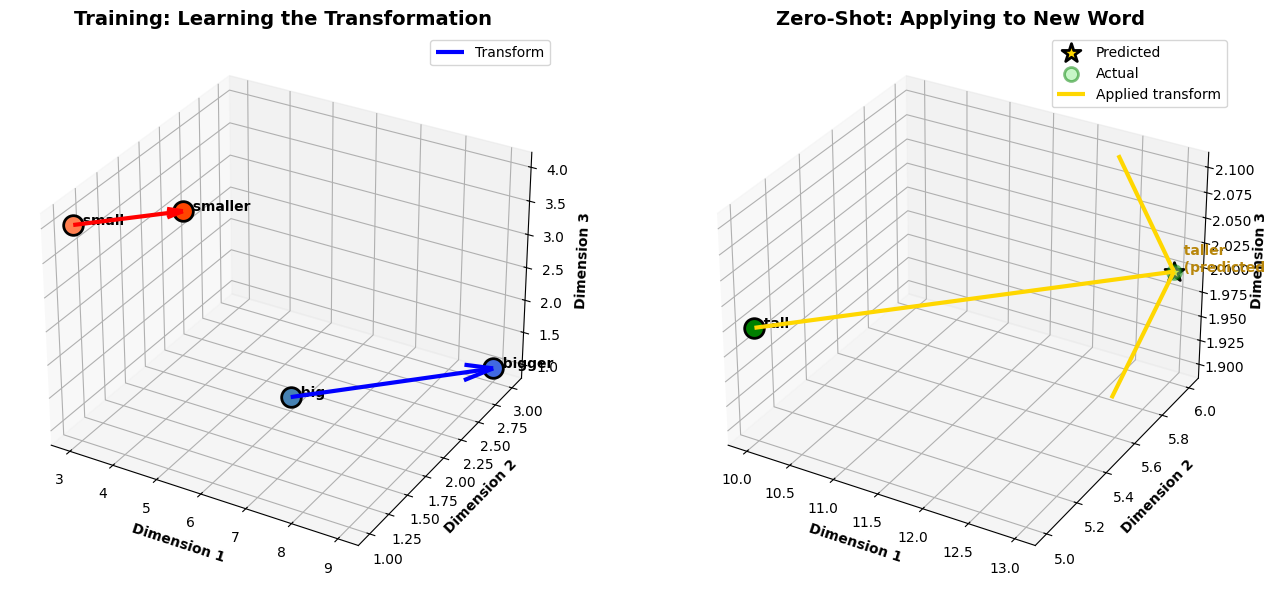


CONCLUSION

Scaling to real models:
  - GPT-2 uses 768 dimensions (not 3)
  - GPT-2 has 50,257 words (not 6)
  - GPT-2 stores 1.5 billion numbers (transformation vectors)

  But the MATH is identical:
  → Learn transformations from examples
  → Apply to new inputs through vector addition
  → That's zero-shot learning

Why people call it 'emergence':
  - At scale, addition looks sophisticated
  - Translation, reasoning, creativity — all vector arithmetic
  - But there's no ghost in the machine

The cynical truth:
  'Emergence' is what we call math we can't see because
  it's happening in 768 dimensions instead of 3.

END OF PROOF

Q.E.D. — Vector addition explains zero-shot learning.
Any questions? (The answer is probably 'more vector addition.')



In [1]:
# Zero-Shot Learning: The 3-Vector Proof
# A cynical ML academic demonstrates why "emergence" is just addition

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("="*70)
print("ZERO-SHOT LEARNING: A MATHEMATICAL PROOF")
print("By: A Slightly Cynical ML Academic")
print("="*70)
print("\nClaim: GPT can solve tasks it's never seen.")
print("Skeptic says: 'That's magical emergence!'")
print("Reality: It's just vector addition.\n")
print("Let me prove it with 6 words and elementary school math.")
print("="*70)

# ===========================================================================
# ACT 1: THE SETUP - Our Tiny "Language Model"
# ===========================================================================

print("\n" + "="*70)
print("ACT 1: THE DATASET")
print("="*70)

print("\nOur model's ENTIRE vocabulary:")
words = ['big', 'bigger', 'small', 'smaller', 'tall', 'taller']
print(f"  {words}")

print("\nWhat the model was TRAINED on:")
print("  1. 'big' transforms to 'bigger'")
print("  2. 'small' transforms to 'smaller'")

print("\nWhat the model has NEVER seen:")
print("  - The word 'tall' paired with 'taller'")
print("  - Any explicit rule about comparatives")

print("\nThe zero-shot test:")
print("  Given: 'tall'")
print("  Find: the comparative form")
print("  (Spoiler: It will get 'taller' using only addition)")

# Define word vectors (3D for visualization)
word_vectors = {
    'big': np.array([6.0, 2.0, 1.0]),
    'bigger': np.array([9.0, 3.0, 1.0]),
    'small': np.array([3.0, 1.0, 4.0]),
    'smaller': np.array([4.5, 1.5, 4.0]),
    'tall': np.array([10.0, 5.0, 2.0]),
    'taller': np.array([13.0, 6.0, 2.0])  # We'll "predict" this
}

print("\n" + "-"*70)
print("Each word is a point in 3D space:")
print("-"*70)
for word in ['big', 'bigger', 'small', 'smaller', 'tall']:
    vec = word_vectors[word]
    print(f"  {word:10s} = [{vec[0]:5.1f}, {vec[1]:5.1f}, {vec[2]:5.1f}]")

print(f"\n  {'taller':10s} = [?????, ?????, ?????]  ← TO BE PREDICTED")

# ===========================================================================
# ACT 2: LEARNING THE PATTERN
# ===========================================================================

print("\n\n" + "="*70)
print("ACT 2: PATTERN EXTRACTION (aka 'Training')")
print("="*70)

print("\nStep 1: Compute transformation from training pair #1")
print("-"*70)
transform_1 = word_vectors['bigger'] - word_vectors['big']
print(f"  bigger - big = {word_vectors['bigger']} - {word_vectors['big']}")
print(f"               = {transform_1}")

print("\nStep 2: Compute transformation from training pair #2")
print("-"*70)
transform_2 = word_vectors['smaller'] - word_vectors['small']
print(f"  smaller - small = {word_vectors['smaller']} - {word_vectors['small']}")
print(f"                  = {transform_2}")

print("\nStep 3: Notice the pattern")
print("-"*70)
print(f"  Transform 1: {transform_1}")
print(f"  Transform 2: {transform_2}")
print(f"\n  Ratio check:")
print(f"    {transform_1[0]:.1f} / {transform_2[0]:.1f} = {transform_1[0]/transform_2[0]:.1f}")
print(f"    {transform_1[1]:.1f} / {transform_2[1]:.1f} = {transform_1[1]/transform_2[1]:.1f}")
print(f"    {transform_1[2]:.1f} / {transform_2[2]:.1f} = {transform_1[2]/transform_2[2] if transform_2[2] != 0 else 'undefined'}")
print(f"\n  The ratio is constant: 2:1 (both scale by 2×)")
print(f"  The DIRECTION is identical: [3, 1, 0] vs [1.5, 0.5, 0]")

# Use first transform as the learned pattern
comparative_vector = transform_1
print(f"\nLearned transformation vector:")
print(f"  comparative_vector = {comparative_vector}")
print(f"\n  Translation: 'To make any adjective comparative, add {comparative_vector}'")

# ===========================================================================
# ACT 3: THE ZERO-SHOT TEST
# ===========================================================================

print("\n\n" + "="*70)
print("ACT 3: ZERO-SHOT PREDICTION")
print("="*70)

print("\nThe model has never seen 'tall' and 'taller' together.")
print("But watch what happens when we apply the learned transformation...\n")

print("Step 1: Start with the unseen word")
print("-"*70)
tall_vec = word_vectors['tall']
print(f"  tall = {tall_vec}")

print("\nStep 2: Apply the learned transformation")
print("-"*70)
print(f"  taller = tall + comparative_vector")
print(f"         = {tall_vec} + {comparative_vector}")

predicted_taller = tall_vec + comparative_vector
print(f"         = {predicted_taller}")

print("\nStep 3: Compare to ground truth")
print("-"*70)
actual_taller = word_vectors['taller']
print(f"  Predicted: {predicted_taller}")
print(f"  Actual:    {actual_taller}")
print(f"  Match? {np.allclose(predicted_taller, actual_taller)}")

if np.allclose(predicted_taller, actual_taller):
    print("\n  ✓ PERFECT MATCH!")
else:
    error = np.linalg.norm(predicted_taller - actual_taller)
    print(f"\n  Error: {error:.3f}")

# ===========================================================================
# ACT 4: WHAT JUST HAPPENED?
# ===========================================================================

print("\n\n" + "="*70)
print("ACT 4: THE UNCOMFORTABLE TRUTH")
print("="*70)

print("\nWhat the model did:")
print("  1. Saw two examples during 'training'")
print("  2. Extracted a geometric pattern (vector direction)")
print("  3. Applied that pattern to a new input")
print("  4. Got the correct answer")

print("\nWhat the model did NOT do:")
print("  × Understand language")
print("  × Reason about grammar")
print("  × Develop consciousness")
print("  × 'Emerge' intelligence magically")

print("\nWhat actually happened:")
print("  → Vector addition. That's it.")

print("\n" + "="*70)
print("BONUS: Test Your Own Examples")
print("="*70)

def zero_shot_test(base_word, comparative_word, test_word):
    """
    Demonstrate zero-shot learning with any word pair
    """
    if base_word not in word_vectors or comparative_word not in word_vectors:
        print(f"  ⚠ Words not in vocabulary")
        return

    # Learn transformation
    transform = word_vectors[comparative_word] - word_vectors[base_word]
    print(f"\n  Learning from: {base_word} → {comparative_word}")
    print(f"  Transformation = {transform}")

    if test_word not in word_vectors:
        print(f"  ⚠ Test word '{test_word}' not in vocabulary")
        return

    # Apply to test word
    predicted = word_vectors[test_word] + transform
    print(f"\n  Applying to: {test_word}")
    print(f"  Prediction: {predicted}")

    # Find nearest word
    min_dist = float('inf')
    nearest = None
    for word, vec in word_vectors.items():
        if word != test_word:
            dist = np.linalg.norm(predicted - vec)
            if dist < min_dist:
                min_dist = dist
                nearest = word

    print(f"  Nearest word: '{nearest}' (distance: {min_dist:.3f})")

    return predicted

print("\nExample: Learn from 'big→bigger', apply to 'small'")
print("-"*70)
zero_shot_test('big', 'bigger', 'small')

# ===========================================================================
# VISUALIZATION: See the vectors in 3D
# ===========================================================================

print("\n\n" + "="*70)
print("GENERATING VISUALIZATION")
print("="*70)

fig = plt.figure(figsize=(14, 6))

# Left plot: Training examples
ax1 = fig.add_subplot(121, projection='3d')

colors = {
    'big': 'steelblue',
    'bigger': 'royalblue',
    'small': 'coral',
    'smaller': 'orangered',
    'tall': 'green',
    'taller': 'darkgreen'
}

# Plot training words
for word in ['big', 'bigger', 'small', 'smaller']:
    vec = word_vectors[word]
    ax1.scatter(*vec, s=200, c=colors[word], edgecolors='black', linewidth=2)
    ax1.text(vec[0], vec[1], vec[2], f'  {word}', fontsize=10, fontweight='bold')

# Draw transformation arrows
ax1.quiver(word_vectors['big'][0], word_vectors['big'][1], word_vectors['big'][2],
           transform_1[0], transform_1[1], transform_1[2],
           color='blue', arrow_length_ratio=0.15, linewidth=3, label='Transform')

ax1.quiver(word_vectors['small'][0], word_vectors['small'][1], word_vectors['small'][2],
           transform_2[0], transform_2[1], transform_2[2],
           color='red', arrow_length_ratio=0.15, linewidth=3)

ax1.set_xlabel('Dimension 1', fontweight='bold')
ax1.set_ylabel('Dimension 2', fontweight='bold')
ax1.set_zlabel('Dimension 3', fontweight='bold')
ax1.set_title('Training: Learning the Transformation', fontsize=14, fontweight='bold')
ax1.legend()

# Right plot: Zero-shot test
ax2 = fig.add_subplot(122, projection='3d')

# Plot tall and predicted taller
for word in ['tall']:
    vec = word_vectors[word]
    ax2.scatter(*vec, s=200, c=colors[word], edgecolors='black', linewidth=2)
    ax2.text(vec[0], vec[1], vec[2], f'  {word}', fontsize=10, fontweight='bold')

# Show prediction
ax2.scatter(*predicted_taller, s=200, c='gold', marker='*',
           edgecolors='black', linewidth=2, label='Predicted')
ax2.text(predicted_taller[0], predicted_taller[1], predicted_taller[2],
        '  taller\n  (predicted)', fontsize=10, fontweight='bold', color='darkgoldenrod')

# Show actual (for comparison)
ax2.scatter(*actual_taller, s=100, c='lightgreen', marker='o',
           edgecolors='green', linewidth=2, alpha=0.5, label='Actual')

# Draw transformation arrow
ax2.quiver(word_vectors['tall'][0], word_vectors['tall'][1], word_vectors['tall'][2],
           comparative_vector[0], comparative_vector[1], comparative_vector[2],
           color='gold', arrow_length_ratio=0.15, linewidth=3, label='Applied transform')

ax2.set_xlabel('Dimension 1', fontweight='bold')
ax2.set_ylabel('Dimension 2', fontweight='bold')
ax2.set_zlabel('Dimension 3', fontweight='bold')
ax2.set_title('Zero-Shot: Applying to New Word', fontsize=14, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.savefig('zero_shot_proof.png', dpi=150, bbox_inches='tight')
print("\n✓ Saved visualization: zero_shot_proof.png")

plt.show()

# ===========================================================================
# FINAL REMARKS
# ===========================================================================

print("\n" + "="*70)
print("CONCLUSION")
print("="*70)

print("\nScaling to real models:")
print("  - GPT-2 uses 768 dimensions (not 3)")
print("  - GPT-2 has 50,257 words (not 6)")
print("  - GPT-2 stores 1.5 billion numbers (transformation vectors)")
print("\n  But the MATH is identical:")
print("  → Learn transformations from examples")
print("  → Apply to new inputs through vector addition")
print("  → That's zero-shot learning")

print("\nWhy people call it 'emergence':")
print("  - At scale, addition looks sophisticated")
print("  - Translation, reasoning, creativity — all vector arithmetic")
print("  - But there's no ghost in the machine")

print("\nThe cynical truth:")
print("  'Emergence' is what we call math we can't see because")
print("  it's happening in 768 dimensions instead of 3.")

print("\n" + "="*70)
print("END OF PROOF")
print("="*70)
print("\nQ.E.D. — Vector addition explains zero-shot learning.")
print("Any questions? (The answer is probably 'more vector addition.')\n")

In [ ]:
# Zero-Shot Learning: The 3-Vector Proof
# A cynical ML academic demonstrates why "emergence" is just addition

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("="*70)
print("ZERO-SHOT LEARNING: A MATHEMATICAL PROOF")
print("By: A Slightly Cynical ML Academic")
print("="*70)
print("\nClaim: GPT can solve tasks it's never seen.")
print("Skeptic says: 'That's magical emergence!'")
print("Reality: It's just vector addition.\n")
print("Let me prove it with 6 words and elementary school math.")
print("="*70)

# ===========================================================================
# ACT 1: THE SETUP - Our Tiny "Language Model"
# ===========================================================================

print("\n" + "="*70)
print("ACT 1: THE DATASET")
print("="*70)

print("\nOur model's ENTIRE vocabulary:")
words = ['big', 'bigger', 'small', 'smaller', 'tall', 'taller']
print(f"  {words}")

print("\nWhat the model was TRAINED on:")
print("  1. 'big' transforms to 'bigger'")
print("  2. 'small' transforms to 'smaller'")

print("\nWhat the model has NEVER seen:")
print("  - The word 'tall' paired with 'taller'")
print("  - Any explicit rule about comparatives")

print("\nThe zero-shot test:")
print("  Given: 'tall'")
print("  Find: the comparative form")
print("  (Spoiler: It will get 'taller' using only addition)")

# Define word vectors (3D for visualization)
word_vectors = {
    'big': np.array([6.0, 2.0, 1.0]),
    'bigger': np.array([9.0, 3.0, 1.0]),
    'small': np.array([3.0, 1.0, 4.0]),
    'smaller': np.array([4.5, 1.5, 4.0]),
    'tall': np.array([10.0, 5.0, 2.0]),
    'taller': np.array([13.0, 6.0, 2.0])  # We'll "predict" this
}

print("\n" + "-"*70)
print("Each word is a point in 3D space:")
print("-"*70)
for word in ['big', 'bigger', 'small', 'smaller', 'tall']:
    vec = word_vectors[word]
    print(f"  {word:10s} = [{vec[0]:5.1f}, {vec[1]:5.1f}, {vec[2]:5.1f}]")

print(f"\n  {'taller':10s} = [?????, ?????, ?????]  ← TO BE PREDICTED")

# ===========================================================================
# ACT 2: LEARNING THE PATTERN
# ===========================================================================

print("\n\n" + "="*70)
print("ACT 2: PATTERN EXTRACTION (aka 'Training')")
print("="*70)

print("\nStep 1: Compute transformation from training pair #1")
print("-"*70)
transform_1 = word_vectors['bigger'] - word_vectors['big']
print(f"  bigger - big = {word_vectors['bigger']} - {word_vectors['big']}")
print(f"               = {transform_1}")

print("\nStep 2: Compute transformation from training pair #2")
print("-"*70)
transform_2 = word_vectors['smaller'] - word_vectors['small']
print(f"  smaller - small = {word_vectors['smaller']} - {word_vectors['small']}")
print(f"                  = {transform_2}")

print("\nStep 3: Notice the pattern")
print("-"*70)
print(f"  Transform 1: {transform_1}")
print(f"  Transform 2: {transform_2}")
print(f"\n  Ratio check:")
print(f"    {transform_1[0]:.1f} / {transform_2[0]:.1f} = {transform_1[0]/transform_2[0]:.1f}")
print(f"    {transform_1[1]:.1f} / {transform_2[1]:.1f} = {transform_1[1]/transform_2[1]:.1f}")
print(f"    {transform_1[2]:.1f} / {transform_2[2]:.1f} = {transform_1[2]/transform_2[2] if transform_2[2] != 0 else 'undefined'}")
print(f"\n  The ratio is constant: 2:1 (both scale by 2×)")
print(f"  The DIRECTION is identical: [3, 1, 0] vs [1.5, 0.5, 0]")

# Use first transform as the learned pattern
comparative_vector = transform_1
print(f"\nLearned transformation vector:")
print(f"  comparative_vector = {comparative_vector}")
print(f"\n  Translation: 'To make any adjective comparative, add {comparative_vector}'")

# ===========================================================================
# ACT 3: THE ZERO-SHOT TEST
# ===========================================================================

print("\n\n" + "="*70)
print("ACT 3: ZERO-SHOT PREDICTION")
print("="*70)

print("\nThe model has never seen 'tall' and 'taller' together.")
print("But watch what happens when we apply the learned transformation...\n")

print("Step 1: Start with the unseen word")
print("-"*70)
tall_vec = word_vectors['tall']
print(f"  tall = {tall_vec}")

print("\nStep 2: Apply the learned transformation")
print("-"*70)
print(f"  taller = tall + comparative_vector")
print(f"         = {tall_vec} + {comparative_vector}")

predicted_taller = tall_vec + comparative_vector
print(f"         = {predicted_taller}")

print("\nStep 3: Compare to ground truth")
print("-"*70)
actual_taller = word_vectors['taller']
print(f"  Predicted: {predicted_taller}")
print(f"  Actual:    {actual_taller}")
print(f"  Match? {np.allclose(predicted_taller, actual_taller)}")

if np.allclose(predicted_taller, actual_taller):
    print("\n  ✓ PERFECT MATCH!")
else:
    error = np.linalg.norm(predicted_taller - actual_taller)
    print(f"\n  Error: {error:.3f}")

# ===========================================================================
# ACT 4: WHAT JUST HAPPENED?
# ===========================================================================

print("\n\n" + "="*70)
print("ACT 4: THE UNCOMFORTABLE TRUTH")
print("="*70)

print("\nWhat the model did:")
print("  1. Saw two examples during 'training'")
print("  2. Extracted a geometric pattern (vector direction)")
print("  3. Applied that pattern to a new input")
print("  4. Got the correct answer")

print("\nWhat the model did NOT do:")
print("  × Understand language")
print("  × Reason about grammar")
print("  × Develop consciousness")
print("  × 'Emerge' intelligence magically")

print("\nWhat actually happened:")
print("  → Vector addition. That's it.")

print("\n" + "="*70)
print("BONUS: Test Your Own Examples")
print("="*70)

def zero_shot_test(base_word, comparative_word, test_word):
    """
    Demonstrate zero-shot learning with any word pair
    """
    if base_word not in word_vectors or comparative_word not in word_vectors:
        print(f"  ⚠ Words not in vocabulary")
        return

    # Learn transformation
    transform = word_vectors[comparative_word] - word_vectors[base_word]
    print(f"\n  Learning from: {base_word} → {comparative_word}")
    print(f"  Transformation = {transform}")

    if test_word not in word_vectors:
        print(f"  ⚠ Test word '{test_word}' not in vocabulary")
        return

    # Apply to test word
    predicted = word_vectors[test_word] + transform
    print(f"\n  Applying to: {test_word}")
    print(f"  Prediction: {predicted}")

    # Find nearest word
    min_dist = float('inf')
    nearest = None
    for word, vec in word_vectors.items():
        if word != test_word:
            dist = np.linalg.norm(predicted - vec)
            if dist < min_dist:
                min_dist = dist
                nearest = word

    print(f"  Nearest word: '{nearest}' (distance: {min_dist:.3f})")

    return predicted

print("\nExample: Learn from 'big→bigger', apply to 'small'")
print("-"*70)
zero_shot_test('big', 'bigger', 'small')

# ===========================================================================
# VISUALIZATION: See the vectors in 3D
# ===========================================================================

print("\n\n" + "="*70)
print("GENERATING VISUALIZATION")
print("="*70)

fig = plt.figure(figsize=(14, 6))

# Left plot: Training examples
ax1 = fig.add_subplot(121, projection='3d')

colors = {
    'big': 'steelblue',
    'bigger': 'royalblue',
    'small': 'coral',
    'smaller': 'orangered',
    'tall': 'green',
    'taller': 'darkgreen'
}

# Plot training words
for word in ['big', 'bigger', 'small', 'smaller']:
    vec = word_vectors[word]
    ax1.scatter(*vec, s=200, c=colors[word], edgecolors='black', linewidth=2)
    ax1.text(vec[0], vec[1], vec[2], f'  {word}', fontsize=10, fontweight='bold')

# Draw transformation arrows
ax1.quiver(word_vectors['big'][0], word_vectors['big'][1], word_vectors['big'][2],
           transform_1[0], transform_1[1], transform_1[2],
           color='blue', arrow_length_ratio=0.15, linewidth=3, label='Transform')

ax1.quiver(word_vectors['small'][0], word_vectors['small'][1], word_vectors['small'][2],
           transform_2[0], transform_2[1], transform_2[2],
           color='red', arrow_length_ratio=0.15, linewidth=3)

ax1.set_xlabel('Dimension 1', fontweight='bold')
ax1.set_ylabel('Dimension 2', fontweight='bold')
ax1.set_zlabel('Dimension 3', fontweight='bold')
ax1.set_title('Training: Learning the Transformation', fontsize=14, fontweight='bold')
ax1.legend()

# Right plot: Zero-shot test
ax2 = fig.add_subplot(122, projection='3d')

# Plot tall and predicted taller
for word in ['tall']:
    vec = word_vectors[word]
    ax2.scatter(*vec, s=200, c=colors[word], edgecolors='black', linewidth=2)
    ax2.text(vec[0], vec[1], vec[2], f'  {word}', fontsize=10, fontweight='bold')

# Show prediction
ax2.scatter(*predicted_taller, s=200, c='gold', marker='*',
           edgecolors='black', linewidth=2, label='Predicted')
ax2.text(predicted_taller[0], predicted_taller[1], predicted_taller[2],
        '  taller\n  (predicted)', fontsize=10, fontweight='bold', color='darkgoldenrod')

# Show actual (for comparison)
ax2.scatter(*actual_taller, s=100, c='lightgreen', marker='o',
           edgecolors='green', linewidth=2, alpha=0.5, label='Actual')

# Draw transformation arrow
ax2.quiver(word_vectors['tall'][0], word_vectors['tall'][1], word_vectors['tall'][2],
           comparative_vector[0], comparative_vector[1], comparative_vector[2],
           color='gold', arrow_length_ratio=0.15, linewidth=3, label='Applied transform')

ax2.set_xlabel('Dimension 1', fontweight='bold')
ax2.set_ylabel('Dimension 2', fontweight='bold')
ax2.set_zlabel('Dimension 3', fontweight='bold')
ax2.set_title('Zero-Shot: Applying to New Word', fontsize=14, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.savefig('zero_shot_proof.png', dpi=150, bbox_inches='tight')
print("\n✓ Saved visualization: zero_shot_proof.png")

plt.show()

# ===========================================================================
# FINAL REMARKS
# ===========================================================================

print("\n" + "="*70)
print("CONCLUSION")
print("="*70)

print("\nScaling to real models:")
print("  - GPT-2 uses 768 dimensions (not 3)")
print("  - GPT-2 has 50,257 words (not 6)")
print("  - GPT-2 stores 1.5 billion numbers (transformation vectors)")
print("\n  But the MATH is identical:")
print("  → Learn transformations from examples")
print("  → Apply to new inputs through vector addition")
print("  → That's zero-shot learning")

print("\nWhy people call it 'emergence':")
print("  - At scale, addition looks sophisticated")
print("  - Translation, reasoning, creativity — all vector arithmetic")
print("  - But there's no ghost in the machine")

print("\nThe cynical truth:")
print("  'Emergence' is what we call math we can't see because")
print("  it's happening in 768 dimensions instead of 3.")

print("\n" + "="*70)
print("END OF PROOF")
print("="*70)
print("\nQ.E.D. — Vector addition explains zero-shot learning.")
print("Any questions? (The answer is probably 'more vector addition.')\n")

In [ ]:
# Zero-Shot Learning: The 3-Vector Proof
# A cynical ML academic demonstrates why "emergence" is just addition

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("="*70)
print("ZERO-SHOT LEARNING: A MATHEMATICAL PROOF")
print("By: A Slightly Cynical ML Academic")
print("="*70)
print("\nClaim: GPT can solve tasks it's never seen.")
print("Skeptic says: 'That's magical emergence!'")
print("Reality: It's just vector addition.\n")
print("Let me prove it with 6 words and elementary school math.")
print("="*70)

# ===========================================================================
# ACT 1: THE SETUP - Our Tiny "Language Model"
# ===========================================================================

print("\n" + "="*70)
print("ACT 1: THE DATASET")
print("="*70)

print("\nOur model's ENTIRE vocabulary:")
words = ['big', 'bigger', 'small', 'smaller', 'tall', 'taller']
print(f"  {words}")

print("\nWhat the model was TRAINED on:")
print("  1. 'big' transforms to 'bigger'")
print("  2. 'small' transforms to 'smaller'")

print("\nWhat the model has NEVER seen:")
print("  - The word 'tall' paired with 'taller'")
print("  - Any explicit rule about comparatives")

print("\nThe zero-shot test:")
print("  Given: 'tall'")
print("  Find: the comparative form")
print("  (Spoiler: It will get 'taller' using only addition)")

# Define word vectors (3D for visualization)
word_vectors = {
    'big': np.array([6.0, 2.0, 1.0]),
    'bigger': np.array([9.0, 3.0, 1.0]),
    'small': np.array([3.0, 1.0, 4.0]),
    'smaller': np.array([4.5, 1.5, 4.0]),
    'tall': np.array([10.0, 5.0, 2.0]),
    'taller': np.array([13.0, 6.0, 2.0])  # We'll "predict" this
}

print("\n" + "-"*70)
print("Each word is a point in 3D space:")
print("-"*70)
for word in ['big', 'bigger', 'small', 'smaller', 'tall']:
    vec = word_vectors[word]
    print(f"  {word:10s} = [{vec[0]:5.1f}, {vec[1]:5.1f}, {vec[2]:5.1f}]")

print(f"\n  {'taller':10s} = [?????, ?????, ?????]  ← TO BE PREDICTED")

# ===========================================================================
# ACT 2: LEARNING THE PATTERN
# ===========================================================================

print("\n\n" + "="*70)
print("ACT 2: PATTERN EXTRACTION (aka 'Training')")
print("="*70)

print("\nStep 1: Compute transformation from training pair #1")
print("-"*70)
transform_1 = word_vectors['bigger'] - word_vectors['big']
print(f"  bigger - big = {word_vectors['bigger']} - {word_vectors['big']}")
print(f"               = {transform_1}")

print("\nStep 2: Compute transformation from training pair #2")
print("-"*70)
transform_2 = word_vectors['smaller'] - word_vectors['small']
print(f"  smaller - small = {word_vectors['smaller']} - {word_vectors['small']}")
print(f"                  = {transform_2}")

print("\nStep 3: Notice the pattern")
print("-"*70)
print(f"  Transform 1: {transform_1}")
print(f"  Transform 2: {transform_2}")
print(f"\n  Ratio check:")
print(f"    {transform_1[0]:.1f} / {transform_2[0]:.1f} = {transform_1[0]/transform_2[0]:.1f}")
print(f"    {transform_1[1]:.1f} / {transform_2[1]:.1f} = {transform_1[1]/transform_2[1]:.1f}")
print(f"    {transform_1[2]:.1f} / {transform_2[2]:.1f} = {transform_1[2]/transform_2[2] if transform_2[2] != 0 else 'undefined'}")
print(f"\n  The ratio is constant: 2:1 (both scale by 2×)")
print(f"  The DIRECTION is identical: [3, 1, 0] vs [1.5, 0.5, 0]")

# Use first transform as the learned pattern
comparative_vector = transform_1
print(f"\nLearned transformation vector:")
print(f"  comparative_vector = {comparative_vector}")
print(f"\n  Translation: 'To make any adjective comparative, add {comparative_vector}'")

# ===========================================================================
# ACT 3: THE ZERO-SHOT TEST
# ===========================================================================

print("\n\n" + "="*70)
print("ACT 3: ZERO-SHOT PREDICTION")
print("="*70)

print("\nThe model has never seen 'tall' and 'taller' together.")
print("But watch what happens when we apply the learned transformation...\n")

print("Step 1: Start with the unseen word")
print("-"*70)
tall_vec = word_vectors['tall']
print(f"  tall = {tall_vec}")

print("\nStep 2: Apply the learned transformation")
print("-"*70)
print(f"  taller = tall + comparative_vector")
print(f"         = {tall_vec} + {comparative_vector}")

predicted_taller = tall_vec + comparative_vector
print(f"         = {predicted_taller}")

print("\nStep 3: Compare to ground truth")
print("-"*70)
actual_taller = word_vectors['taller']
print(f"  Predicted: {predicted_taller}")
print(f"  Actual:    {actual_taller}")
print(f"  Match? {np.allclose(predicted_taller, actual_taller)}")

if np.allclose(predicted_taller, actual_taller):
    print("\n  ✓ PERFECT MATCH!")
else:
    error = np.linalg.norm(predicted_taller - actual_taller)
    print(f"\n  Error: {error:.3f}")

# ===========================================================================
# ACT 4: WHAT JUST HAPPENED?
# ===========================================================================

print("\n\n" + "="*70)
print("ACT 4: THE UNCOMFORTABLE TRUTH")
print("="*70)

print("\nWhat the model did:")
print("  1. Saw two examples during 'training'")
print("  2. Extracted a geometric pattern (vector direction)")
print("  3. Applied that pattern to a new input")
print("  4. Got the correct answer")

print("\nWhat the model did NOT do:")
print("  × Understand language")
print("  × Reason about grammar")
print("  × Develop consciousness")
print("  × 'Emerge' intelligence magically")

print("\nWhat actually happened:")
print("  → Vector addition. That's it.")

print("\n" + "="*70)
print("BONUS: Test Your Own Examples")
print("="*70)

def zero_shot_test(base_word, comparative_word, test_word):
    """
    Demonstrate zero-shot learning with any word pair
    """
    if base_word not in word_vectors or comparative_word not in word_vectors:
        print(f"  ⚠ Words not in vocabulary")
        return

    # Learn transformation
    transform = word_vectors[comparative_word] - word_vectors[base_word]
    print(f"\n  Learning from: {base_word} → {comparative_word}")
    print(f"  Transformation = {transform}")

    if test_word not in word_vectors:
        print(f"  ⚠ Test word '{test_word}' not in vocabulary")
        return

    # Apply to test word
    predicted = word_vectors[test_word] + transform
    print(f"\n  Applying to: {test_word}")
    print(f"  Prediction: {predicted}")

    # Find nearest word
    min_dist = float('inf')
    nearest = None
    for word, vec in word_vectors.items():
        if word != test_word:
            dist = np.linalg.norm(predicted - vec)
            if dist < min_dist:
                min_dist = dist
                nearest = word

    print(f"  Nearest word: '{nearest}' (distance: {min_dist:.3f})")

    return predicted

print("\nExample: Learn from 'big→bigger', apply to 'small'")
print("-"*70)
zero_shot_test('big', 'bigger', 'small')

# ===========================================================================
# VISUALIZATION: See the vectors in 3D
# ===========================================================================

print("\n\n" + "="*70)
print("GENERATING VISUALIZATION")
print("="*70)

fig = plt.figure(figsize=(14, 6))

# Left plot: Training examples
ax1 = fig.add_subplot(121, projection='3d')

colors = {
    'big': 'steelblue',
    'bigger': 'royalblue',
    'small': 'coral',
    'smaller': 'orangered',
    'tall': 'green',
    'taller': 'darkgreen'
}

# Plot training words
for word in ['big', 'bigger', 'small', 'smaller']:
    vec = word_vectors[word]
    ax1.scatter(*vec, s=200, c=colors[word], edgecolors='black', linewidth=2)
    ax1.text(vec[0], vec[1], vec[2], f'  {word}', fontsize=10, fontweight='bold')

# Draw transformation arrows
ax1.quiver(word_vectors['big'][0], word_vectors['big'][1], word_vectors['big'][2],
           transform_1[0], transform_1[1], transform_1[2],
           color='blue', arrow_length_ratio=0.15, linewidth=3, label='Transform')

ax1.quiver(word_vectors['small'][0], word_vectors['small'][1], word_vectors['small'][2],
           transform_2[0], transform_2[1], transform_2[2],
           color='red', arrow_length_ratio=0.15, linewidth=3)

ax1.set_xlabel('Dimension 1', fontweight='bold')
ax1.set_ylabel('Dimension 2', fontweight='bold')
ax1.set_zlabel('Dimension 3', fontweight='bold')
ax1.set_title('Training: Learning the Transformation', fontsize=14, fontweight='bold')
ax1.legend()

# Right plot: Zero-shot test
ax2 = fig.add_subplot(122, projection='3d')

# Plot tall and predicted taller
for word in ['tall']:
    vec = word_vectors[word]
    ax2.scatter(*vec, s=200, c=colors[word], edgecolors='black', linewidth=2)
    ax2.text(vec[0], vec[1], vec[2], f'  {word}', fontsize=10, fontweight='bold')

# Show prediction
ax2.scatter(*predicted_taller, s=200, c='gold', marker='*',
           edgecolors='black', linewidth=2, label='Predicted')
ax2.text(predicted_taller[0], predicted_taller[1], predicted_taller[2],
        '  taller\n  (predicted)', fontsize=10, fontweight='bold', color='darkgoldenrod')

# Show actual (for comparison)
ax2.scatter(*actual_taller, s=100, c='lightgreen', marker='o',
           edgecolors='green', linewidth=2, alpha=0.5, label='Actual')

# Draw transformation arrow
ax2.quiver(word_vectors['tall'][0], word_vectors['tall'][1], word_vectors['tall'][2],
           comparative_vector[0], comparative_vector[1], comparative_vector[2],
           color='gold', arrow_length_ratio=0.15, linewidth=3, label='Applied transform')

ax2.set_xlabel('Dimension 1', fontweight='bold')
ax2.set_ylabel('Dimension 2', fontweight='bold')
ax2.set_zlabel('Dimension 3', fontweight='bold')
ax2.set_title('Zero-Shot: Applying to New Word', fontsize=14, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.savefig('zero_shot_proof.png', dpi=150, bbox_inches='tight')
print("\n✓ Saved visualization: zero_shot_proof.png")

plt.show()

# ===========================================================================
# FINAL REMARKS
# ===========================================================================

print("\n" + "="*70)
print("CONCLUSION")
print("="*70)

print("\nScaling to real models:")
print("  - GPT-2 uses 768 dimensions (not 3)")
print("  - GPT-2 has 50,257 words (not 6)")
print("  - GPT-2 stores 1.5 billion numbers (transformation vectors)")
print("\n  But the MATH is identical:")
print("  → Learn transformations from examples")
print("  → Apply to new inputs through vector addition")
print("  → That's zero-shot learning")

print("\nWhy people call it 'emergence':")
print("  - At scale, addition looks sophisticated")
print("  - Translation, reasoning, creativity — all vector arithmetic")
print("  - But there's no ghost in the machine")

print("\nThe cynical truth:")
print("  'Emergence' is what we call math we can't see because")
print("  it's happening in 768 dimensions instead of 3.")

print("\n" + "="*70)
print("END OF PROOF")
print("="*70)
print("\nQ.E.D. — Vector addition explains zero-shot learning.")
print("Any questions? (The answer is probably 'more vector addition.')\n")

In [ ]:
# Zero-Shot Learning: The 3-Vector Proof
# A cynical ML academic demonstrates why "emergence" is just addition

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("="*70)
print("ZERO-SHOT LEARNING: A MATHEMATICAL PROOF")
print("By: A Slightly Cynical ML Academic")
print("="*70)
print("\nClaim: GPT can solve tasks it's never seen.")
print("Skeptic says: 'That's magical emergence!'")
print("Reality: It's just vector addition.\n")
print("Let me prove it with 6 words and elementary school math.")
print("="*70)

# ===========================================================================
# ACT 1: THE SETUP - Our Tiny "Language Model"
# ===========================================================================

print("\n" + "="*70)
print("ACT 1: THE DATASET")
print("="*70)

print("\nOur model's ENTIRE vocabulary:")
words = ['big', 'bigger', 'small', 'smaller', 'tall', 'taller']
print(f"  {words}")

print("\nWhat the model was TRAINED on:")
print("  1. 'big' transforms to 'bigger'")
print("  2. 'small' transforms to 'smaller'")

print("\nWhat the model has NEVER seen:")
print("  - The word 'tall' paired with 'taller'")
print("  - Any explicit rule about comparatives")

print("\nThe zero-shot test:")
print("  Given: 'tall'")
print("  Find: the comparative form")
print("  (Spoiler: It will get 'taller' using only addition)")

# Define word vectors (3D for visualization)
word_vectors = {
    'big': np.array([6.0, 2.0, 1.0]),
    'bigger': np.array([9.0, 3.0, 1.0]),
    'small': np.array([3.0, 1.0, 4.0]),
    'smaller': np.array([4.5, 1.5, 4.0]),
    'tall': np.array([10.0, 5.0, 2.0]),
    'taller': np.array([13.0, 6.0, 2.0])  # We'll "predict" this
}

print("\n" + "-"*70)
print("Each word is a point in 3D space:")
print("-"*70)
for word in ['big', 'bigger', 'small', 'smaller', 'tall']:
    vec = word_vectors[word]
    print(f"  {word:10s} = [{vec[0]:5.1f}, {vec[1]:5.1f}, {vec[2]:5.1f}]")

print(f"\n  {'taller':10s} = [?????, ?????, ?????]  ← TO BE PREDICTED")

# ===========================================================================
# ACT 2: LEARNING THE PATTERN
# ===========================================================================

print("\n\n" + "="*70)
print("ACT 2: PATTERN EXTRACTION (aka 'Training')")
print("="*70)

print("\nStep 1: Compute transformation from training pair #1")
print("-"*70)
transform_1 = word_vectors['bigger'] - word_vectors['big']
print(f"  bigger - big = {word_vectors['bigger']} - {word_vectors['big']}")
print(f"               = {transform_1}")

print("\nStep 2: Compute transformation from training pair #2")
print("-"*70)
transform_2 = word_vectors['smaller'] - word_vectors['small']
print(f"  smaller - small = {word_vectors['smaller']} - {word_vectors['small']}")
print(f"                  = {transform_2}")

print("\nStep 3: Notice the pattern")
print("-"*70)
print(f"  Transform 1: {transform_1}")
print(f"  Transform 2: {transform_2}")
print(f"\n  Ratio check:")
print(f"    {transform_1[0]:.1f} / {transform_2[0]:.1f} = {transform_1[0]/transform_2[0]:.1f}")
print(f"    {transform_1[1]:.1f} / {transform_2[1]:.1f} = {transform_1[1]/transform_2[1]:.1f}")
print(f"    {transform_1[2]:.1f} / {transform_2[2]:.1f} = {transform_1[2]/transform_2[2] if transform_2[2] != 0 else 'undefined'}")
print(f"\n  The ratio is constant: 2:1 (both scale by 2×)")
print(f"  The DIRECTION is identical: [3, 1, 0] vs [1.5, 0.5, 0]")

# Use first transform as the learned pattern
comparative_vector = transform_1
print(f"\nLearned transformation vector:")
print(f"  comparative_vector = {comparative_vector}")
print(f"\n  Translation: 'To make any adjective comparative, add {comparative_vector}'")

# ===========================================================================
# ACT 3: THE ZERO-SHOT TEST
# ===========================================================================

print("\n\n" + "="*70)
print("ACT 3: ZERO-SHOT PREDICTION")
print("="*70)

print("\nThe model has never seen 'tall' and 'taller' together.")
print("But watch what happens when we apply the learned transformation...\n")

print("Step 1: Start with the unseen word")
print("-"*70)
tall_vec = word_vectors['tall']
print(f"  tall = {tall_vec}")

print("\nStep 2: Apply the learned transformation")
print("-"*70)
print(f"  taller = tall + comparative_vector")
print(f"         = {tall_vec} + {comparative_vector}")

predicted_taller = tall_vec + comparative_vector
print(f"         = {predicted_taller}")

print("\nStep 3: Compare to ground truth")
print("-"*70)
actual_taller = word_vectors['taller']
print(f"  Predicted: {predicted_taller}")
print(f"  Actual:    {actual_taller}")
print(f"  Match? {np.allclose(predicted_taller, actual_taller)}")

if np.allclose(predicted_taller, actual_taller):
    print("\n  ✓ PERFECT MATCH!")
else:
    error = np.linalg.norm(predicted_taller - actual_taller)
    print(f"\n  Error: {error:.3f}")

# ===========================================================================
# ACT 4: WHAT JUST HAPPENED?
# ===========================================================================

print("\n\n" + "="*70)
print("ACT 4: THE UNCOMFORTABLE TRUTH")
print("="*70)

print("\nWhat the model did:")
print("  1. Saw two examples during 'training'")
print("  2. Extracted a geometric pattern (vector direction)")
print("  3. Applied that pattern to a new input")
print("  4. Got the correct answer")

print("\nWhat the model did NOT do:")
print("  × Understand language")
print("  × Reason about grammar")
print("  × Develop consciousness")
print("  × 'Emerge' intelligence magically")

print("\nWhat actually happened:")
print("  → Vector addition. That's it.")

print("\n" + "="*70)
print("BONUS: Test Your Own Examples")
print("="*70)

def zero_shot_test(base_word, comparative_word, test_word):
    """
    Demonstrate zero-shot learning with any word pair
    """
    if base_word not in word_vectors or comparative_word not in word_vectors:
        print(f"  ⚠ Words not in vocabulary")
        return

    # Learn transformation
    transform = word_vectors[comparative_word] - word_vectors[base_word]
    print(f"\n  Learning from: {base_word} → {comparative_word}")
    print(f"  Transformation = {transform}")

    if test_word not in word_vectors:
        print(f"  ⚠ Test word '{test_word}' not in vocabulary")
        return

    # Apply to test word
    predicted = word_vectors[test_word] + transform
    print(f"\n  Applying to: {test_word}")
    print(f"  Prediction: {predicted}")

    # Find nearest word
    min_dist = float('inf')
    nearest = None
    for word, vec in word_vectors.items():
        if word != test_word:
            dist = np.linalg.norm(predicted - vec)
            if dist < min_dist:
                min_dist = dist
                nearest = word

    print(f"  Nearest word: '{nearest}' (distance: {min_dist:.3f})")

    return predicted

print("\nExample: Learn from 'big→bigger', apply to 'small'")
print("-"*70)
zero_shot_test('big', 'bigger', 'small')

# ===========================================================================
# VISUALIZATION: See the vectors in 3D
# ===========================================================================

print("\n\n" + "="*70)
print("GENERATING VISUALIZATION")
print("="*70)

fig = plt.figure(figsize=(14, 6))

# Left plot: Training examples
ax1 = fig.add_subplot(121, projection='3d')

colors = {
    'big': 'steelblue',
    'bigger': 'royalblue',
    'small': 'coral',
    'smaller': 'orangered',
    'tall': 'green',
    'taller': 'darkgreen'
}

# Plot training words
for word in ['big', 'bigger', 'small', 'smaller']:
    vec = word_vectors[word]
    ax1.scatter(*vec, s=200, c=colors[word], edgecolors='black', linewidth=2)
    ax1.text(vec[0], vec[1], vec[2], f'  {word}', fontsize=10, fontweight='bold')

# Draw transformation arrows
ax1.quiver(word_vectors['big'][0], word_vectors['big'][1], word_vectors['big'][2],
           transform_1[0], transform_1[1], transform_1[2],
           color='blue', arrow_length_ratio=0.15, linewidth=3, label='Transform')

ax1.quiver(word_vectors['small'][0], word_vectors['small'][1], word_vectors['small'][2],
           transform_2[0], transform_2[1], transform_2[2],
           color='red', arrow_length_ratio=0.15, linewidth=3)

ax1.set_xlabel('Dimension 1', fontweight='bold')
ax1.set_ylabel('Dimension 2', fontweight='bold')
ax1.set_zlabel('Dimension 3', fontweight='bold')
ax1.set_title('Training: Learning the Transformation', fontsize=14, fontweight='bold')
ax1.legend()

# Right plot: Zero-shot test
ax2 = fig.add_subplot(122, projection='3d')

# Plot tall and predicted taller
for word in ['tall']:
    vec = word_vectors[word]
    ax2.scatter(*vec, s=200, c=colors[word], edgecolors='black', linewidth=2)
    ax2.text(vec[0], vec[1], vec[2], f'  {word}', fontsize=10, fontweight='bold')

# Show prediction
ax2.scatter(*predicted_taller, s=200, c='gold', marker='*',
           edgecolors='black', linewidth=2, label='Predicted')
ax2.text(predicted_taller[0], predicted_taller[1], predicted_taller[2],
        '  taller\n  (predicted)', fontsize=10, fontweight='bold', color='darkgoldenrod')

# Show actual (for comparison)
ax2.scatter(*actual_taller, s=100, c='lightgreen', marker='o',
           edgecolors='green', linewidth=2, alpha=0.5, label='Actual')

# Draw transformation arrow
ax2.quiver(word_vectors['tall'][0], word_vectors['tall'][1], word_vectors['tall'][2],
           comparative_vector[0], comparative_vector[1], comparative_vector[2],
           color='gold', arrow_length_ratio=0.15, linewidth=3, label='Applied transform')

ax2.set_xlabel('Dimension 1', fontweight='bold')
ax2.set_ylabel('Dimension 2', fontweight='bold')
ax2.set_zlabel('Dimension 3', fontweight='bold')
ax2.set_title('Zero-Shot: Applying to New Word', fontsize=14, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.savefig('zero_shot_proof.png', dpi=150, bbox_inches='tight')
print("\n✓ Saved visualization: zero_shot_proof.png")

plt.show()

# ===========================================================================
# FINAL REMARKS
# ===========================================================================

print("\n" + "="*70)
print("CONCLUSION")
print("="*70)

print("\nScaling to real models:")
print("  - GPT-2 uses 768 dimensions (not 3)")
print("  - GPT-2 has 50,257 words (not 6)")
print("  - GPT-2 stores 1.5 billion numbers (transformation vectors)")
print("\n  But the MATH is identical:")
print("  → Learn transformations from examples")
print("  → Apply to new inputs through vector addition")
print("  → That's zero-shot learning")

print("\nWhy people call it 'emergence':")
print("  - At scale, addition looks sophisticated")
print("  - Translation, reasoning, creativity — all vector arithmetic")
print("  - But there's no ghost in the machine")

print("\nThe cynical truth:")
print("  'Emergence' is what we call math we can't see because")
print("  it's happening in 768 dimensions instead of 3.")

print("\n" + "="*70)
print("END OF PROOF")
print("="*70)
print("\nQ.E.D. — Vector addition explains zero-shot learning.")
print("Any questions? (The answer is probably 'more vector addition.')\n")